In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [93]:
data = pd.read_csv(r"C:\Users\user\Downloads\water qualtiy assesment.csv")

In [94]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [96]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [97]:
len(data)

3276

In [98]:
data = data.dropna()

In [99]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [100]:
data = data.reset_index()

In [101]:
data

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
1,4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
4,7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2006,3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
2007,3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [102]:
data.duplicated().any()

False

In [103]:
data.skew()

index              0.004376
ph                 0.048947
Hardness          -0.085237
Solids             0.595894
Chloramines        0.012976
Sulfate           -0.046558
Conductivity       0.266869
Organic_carbon    -0.020018
Trihalomethanes   -0.051422
Turbidity         -0.033051
Potability         0.394614
dtype: float64

In [104]:
data.kurtosis()

index             -1.206909
ph                 0.623107
Hardness           0.527205
Solids             0.345032
Chloramines        0.551546
Sulfate            0.787298
Conductivity      -0.239539
Organic_carbon     0.032463
Trihalomethanes    0.224622
Turbidity         -0.049310
Potability        -1.846117
dtype: float64

In [105]:
data.head(2)

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
1,4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<Axes: xlabel='ph', ylabel='Hardness'>

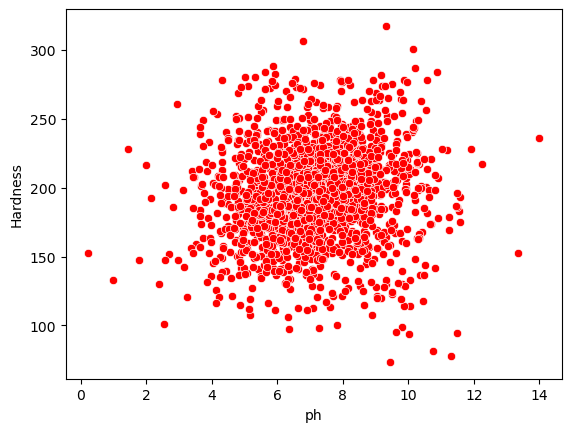

In [106]:
sn.scatterplot(x = 'ph' , y = 'Hardness' , data = data , color = 'red')

<Axes: xlabel='ph', ylabel='Potability'>

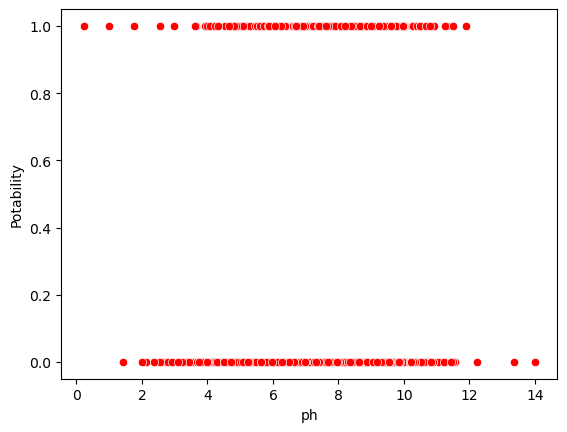

In [107]:
sn.scatterplot(x = 'ph' , y = 'Potability' , data = data , color = 'red')

<Axes: >

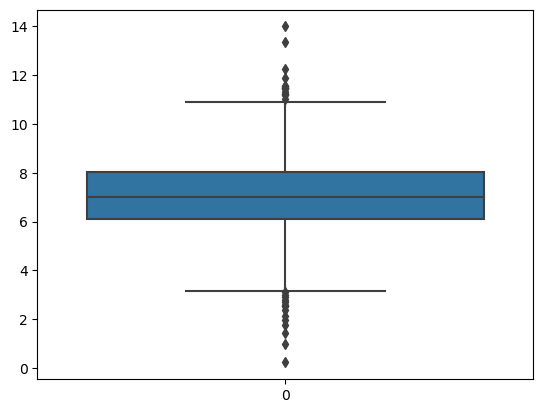

In [108]:
sn.boxplot(data['ph'])

{'whiskers': [<matplotlib.lines.Line2D at 0x165b5b74430>,
 'caps': [<matplotlib.lines.Line2D at 0x165b5b74970>,
 'boxes': [<matplotlib.lines.Line2D at 0x165b5b74190>],
 'medians': [<matplotlib.lines.Line2D at 0x165b5b74eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x165b5b75150>],
 'means': []}

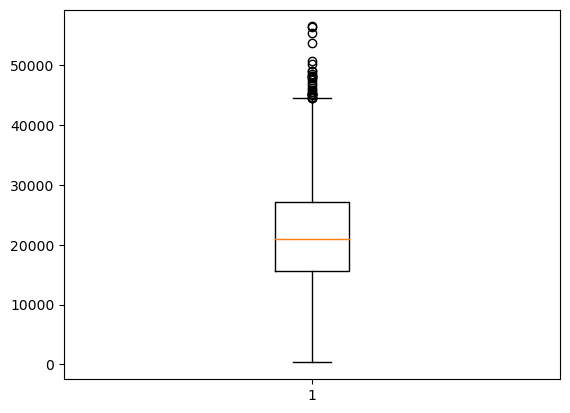

In [109]:
plt.boxplot(data['Solids'])

In [110]:
upper_limit = data['Solids'].mean()+3*data['Solids'].std()
lower_limit = data['Solids'].mean()-3*data['Solids'].std()

In [111]:
print('upper_limit',upper_limit)
print('lower_limit',lower_limit)

upper_limit 47844.160820107856
lower_limit -4009.278071047389


In [112]:
data_outliers = data.loc[(data['Solids']>upper_limit)|(data['Solids']<lower_limit)]

In [113]:
data_outliers.shape

(13, 11)

In [114]:
data = data.loc[(data['Solids']<upper_limit)&(data['Solids']>lower_limit)]

In [115]:
data

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
1,4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
4,7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2006,3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
2007,3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [116]:
upper_limit1 = data['Conductivity'].mean()+3*data['Conductivity'].std()
lower_limit1 = data['Conductivity'].mean()-3*data['Conductivity'].std()

In [117]:
print('upper_limit1',upper_limit1)
print('lower_limit1',lower_limit1)

upper_limit1 669.0463714862298
lower_limit1 184.16597952007658


In [118]:
data_out = data.loc[(data['Conductivity']>upper_limit1)|(data['Conductivity']<lower_limit1)]

In [119]:
data_out

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
35,66,5.058109,238.569380,34873.93452,8.983276,374.433505,669.725086,13.353181,76.521800,5.106656,0
212,342,5.910252,282.739017,15244.84639,6.636551,363.384683,695.369528,13.138353,89.801011,3.660923,1
1311,2134,5.632041,203.730481,19345.92248,8.047798,265.347111,708.226365,15.752252,69.195926,3.511985,0
1656,2704,8.839584,246.066476,21179.76259,7.717662,343.047384,753.342620,16.917901,60.436032,3.118039,0


In [120]:
data = data.loc[(data['Conductivity']<upper_limit1)&(data['Conductivity']>lower_limit1)]

In [121]:
data

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
1,4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989,0
4,7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...,...
2006,3267,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843,1
2007,3268,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,3269,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,3270,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [122]:
x = data.drop(['Potability'] , axis = 1)
y = data['Potability']

In [123]:
x.head(2)

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [124]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2006    1
2007    1
2008    1
2009    1
2010    1
Name: Potability, Length: 1994, dtype: int64

In [125]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [126]:
x_norm = norm_func(x)

In [127]:
x_norm

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.587349,0.577747,0.459108,0.568199,0.587318,0.347575,0.654522,0.795029,0.630115
1,0.000306,0.643654,0.441300,0.373636,0.439304,0.431910,0.423142,0.377248,0.202914,0.520358
2,0.000612,0.388934,0.470876,0.601517,0.524364,0.486902,0.169540,0.249922,0.401487,0.219973
3,0.000918,0.725820,0.715942,0.601539,0.521683,0.709573,0.176386,0.467200,0.658678,0.242428
4,0.001224,0.610517,0.532588,0.282504,0.270288,0.409220,0.586981,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...,...
2006,0.998776,0.636224,0.580511,0.330098,0.418063,0.441203,0.405939,0.310364,0.402799,0.627156
2007,0.999082,0.470143,0.548826,0.358146,0.538273,0.413210,0.274466,0.565061,0.175889,0.395061
2008,0.999388,0.817826,0.087434,0.780107,0.670774,0.261694,0.512339,0.563265,0.285745,0.578674
2009,0.999694,0.424187,0.464092,0.546293,0.541633,0.550134,0.460719,0.397780,0.449156,0.440004


{'whiskers': [<matplotlib.lines.Line2D at 0x165b5992290>,
 'caps': [<matplotlib.lines.Line2D at 0x165b5b76fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x165b5991ff0>],
 'medians': [<matplotlib.lines.Line2D at 0x165b5aeb610>],
 'fliers': [<matplotlib.lines.Line2D at 0x165b5990ee0>],
 'means': []}

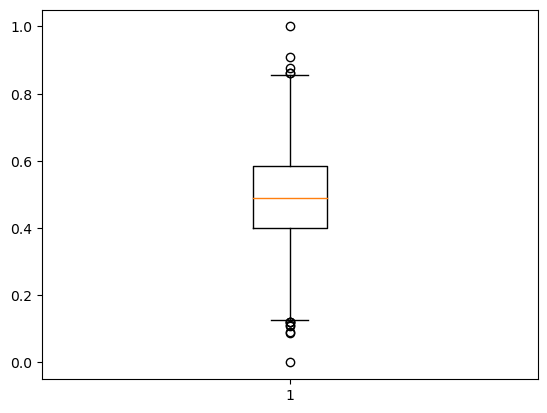

In [128]:
plt.boxplot(x_norm['Organic_carbon'])

In [129]:
upper_limit2 = x_norm['Organic_carbon'].mean()+3*x_norm['Organic_carbon'].std()
lower_limit2 = x_norm['Organic_carbon'].mean()-3*x_norm['Organic_carbon'].std()

In [130]:
print('upper_limit2',upper_limit2)
print('lower_limit2',lower_limit2)

upper_limit2 0.8922451547278465
lower_limit2 0.08840373674083263


In [131]:
x_norm.shape

(1994, 10)

In [132]:
x_norm =  x_norm.loc[(x_norm['Organic_carbon']<upper_limit2)&(x_norm['Organic_carbon']>lower_limit2)]

In [133]:
x_norm

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.587349,0.577747,0.459108,0.568199,0.587318,0.347575,0.654522,0.795029,0.630115
1,0.000306,0.643654,0.441300,0.373636,0.439304,0.431910,0.423142,0.377248,0.202914,0.520358
2,0.000612,0.388934,0.470876,0.601517,0.524364,0.486902,0.169540,0.249922,0.401487,0.219973
3,0.000918,0.725820,0.715942,0.601539,0.521683,0.709573,0.176386,0.467200,0.658678,0.242428
4,0.001224,0.610517,0.532588,0.282504,0.270288,0.409220,0.586981,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...,...
2006,0.998776,0.636224,0.580511,0.330098,0.418063,0.441203,0.405939,0.310364,0.402799,0.627156
2007,0.999082,0.470143,0.548826,0.358146,0.538273,0.413210,0.274466,0.565061,0.175889,0.395061
2008,0.999388,0.817826,0.087434,0.780107,0.670774,0.261694,0.512339,0.563265,0.285745,0.578674
2009,0.999694,0.424187,0.464092,0.546293,0.541633,0.550134,0.460719,0.397780,0.449156,0.440004


{'whiskers': [<matplotlib.lines.Line2D at 0x165b59eb880>,
 'caps': [<matplotlib.lines.Line2D at 0x165b59ebdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x165b59eb5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x165b5a14340>],
 'fliers': [<matplotlib.lines.Line2D at 0x165b5a145e0>],
 'means': []}

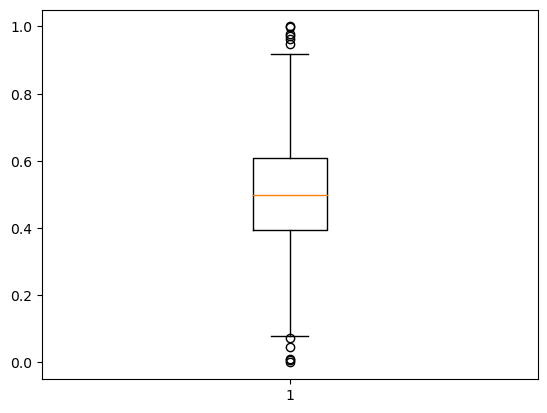

In [134]:
plt.boxplot(x_norm['Turbidity'])

{'whiskers': [<matplotlib.lines.Line2D at 0x165b5a69780>,
 'caps': [<matplotlib.lines.Line2D at 0x165b5a69cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x165b5a694e0>],
 'medians': [<matplotlib.lines.Line2D at 0x165b5a6a200>],
 'fliers': [<matplotlib.lines.Line2D at 0x165b5a6a4a0>],
 'means': []}

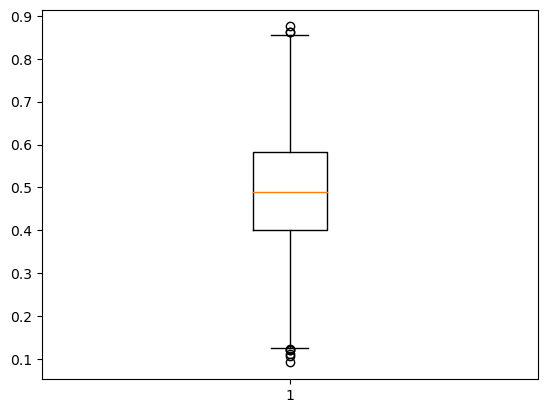

In [135]:
plt.boxplot(x_norm['Organic_carbon'])

In [136]:
upper_limit3 = x_norm['Turbidity'].mean()+3*x_norm['Turbidity'].std()
lower_limit3 = x_norm['Turbidity'].mean()-3*x_norm['Turbidity'].std()

In [137]:
print('upper_limit3',upper_limit3 )
print('lower_limit3',lower_limit3)

upper_limit3 0.9637597427262864
lower_limit3 0.035139317656791014


In [138]:
x_normal = x_norm.loc[(x_norm['Turbidity']<upper_limit3)&(x_norm['Turbidity']>lower_limit3)]

In [139]:
x_normal

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.587349,0.577747,0.459108,0.568199,0.587318,0.347575,0.654522,0.795029,0.630115
1,0.000306,0.643654,0.441300,0.373636,0.439304,0.431910,0.423142,0.377248,0.202914,0.520358
2,0.000612,0.388934,0.470876,0.601517,0.524364,0.486902,0.169540,0.249922,0.401487,0.219973
3,0.000918,0.725820,0.715942,0.601539,0.521683,0.709573,0.176386,0.467200,0.658678,0.242428
4,0.001224,0.610517,0.532588,0.282504,0.270288,0.409220,0.586981,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...,...
2006,0.998776,0.636224,0.580511,0.330098,0.418063,0.441203,0.405939,0.310364,0.402799,0.627156
2007,0.999082,0.470143,0.548826,0.358146,0.538273,0.413210,0.274466,0.565061,0.175889,0.395061
2008,0.999388,0.817826,0.087434,0.780107,0.670774,0.261694,0.512339,0.563265,0.285745,0.578674
2009,0.999694,0.424187,0.464092,0.546293,0.541633,0.550134,0.460719,0.397780,0.449156,0.440004


{'whiskers': [<matplotlib.lines.Line2D at 0x165b5d6c2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x165b5d6c820>,
 'boxes': [<matplotlib.lines.Line2D at 0x165b5d6c040>],
 'medians': [<matplotlib.lines.Line2D at 0x165b5d6cd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x165b5d6d000>],
 'means': []}

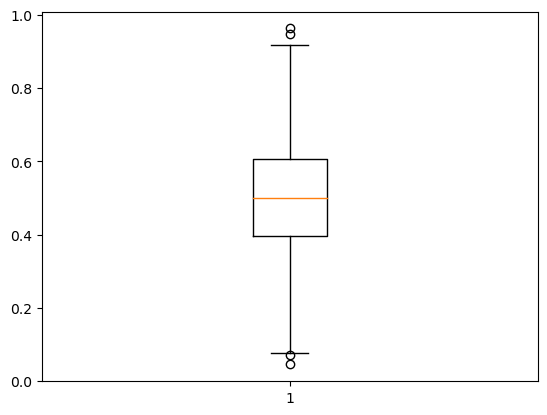

In [140]:
plt.boxplot(x_normal['Turbidity'])

In [141]:
x_normal.corr()

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
index,1.000000,-0.038163,-0.014665,-0.018189,0.006064,0.055293,-0.034106,0.033377,-0.024957,0.029718
ph,-0.038163,1.000000,0.113543,-0.093374,-0.023846,0.012238,0.016097,0.030141,0.022549,-0.036001
Hardness,-0.014665,0.113543,1.000000,-0.048979,-0.022091,-0.111719,0.003115,0.010541,-0.020570,-0.033998
Solids,-0.018189,-0.093374,-0.048979,1.000000,-0.051377,-0.148009,-0.000678,0.003988,-0.022312,0.024231
Chloramines,0.006064,-0.023846,-0.022091,-0.051377,1.000000,-0.003983,-0.028170,-0.023497,0.017125,0.020442
Sulfate,0.055293,0.012238,-0.111719,-0.148009,-0.003983,1.000000,-0.014372,0.016387,-0.021589,-0.005789
Conductivity,-0.034106,0.016097,0.003115,-0.000678,-0.028170,-0.014372,1.000000,0.014332,0.002442,0.009282
Organic_carbon,0.033377,0.030141,0.010541,0.003988,-0.023497,0.016387,0.014332,1.000000,-0.005954,-0.014544
Trihalomethanes,-0.024957,0.022549,-0.020570,-0.022312,0.017125,-0.021589,0.002442,-0.005954,1.000000,-0.022871
Turbidity,0.029718,-0.036001,-0.033998,0.024231,0.020442,-0.005789,0.009282,-0.014544,-0.022871,1.000000


<Axes: >

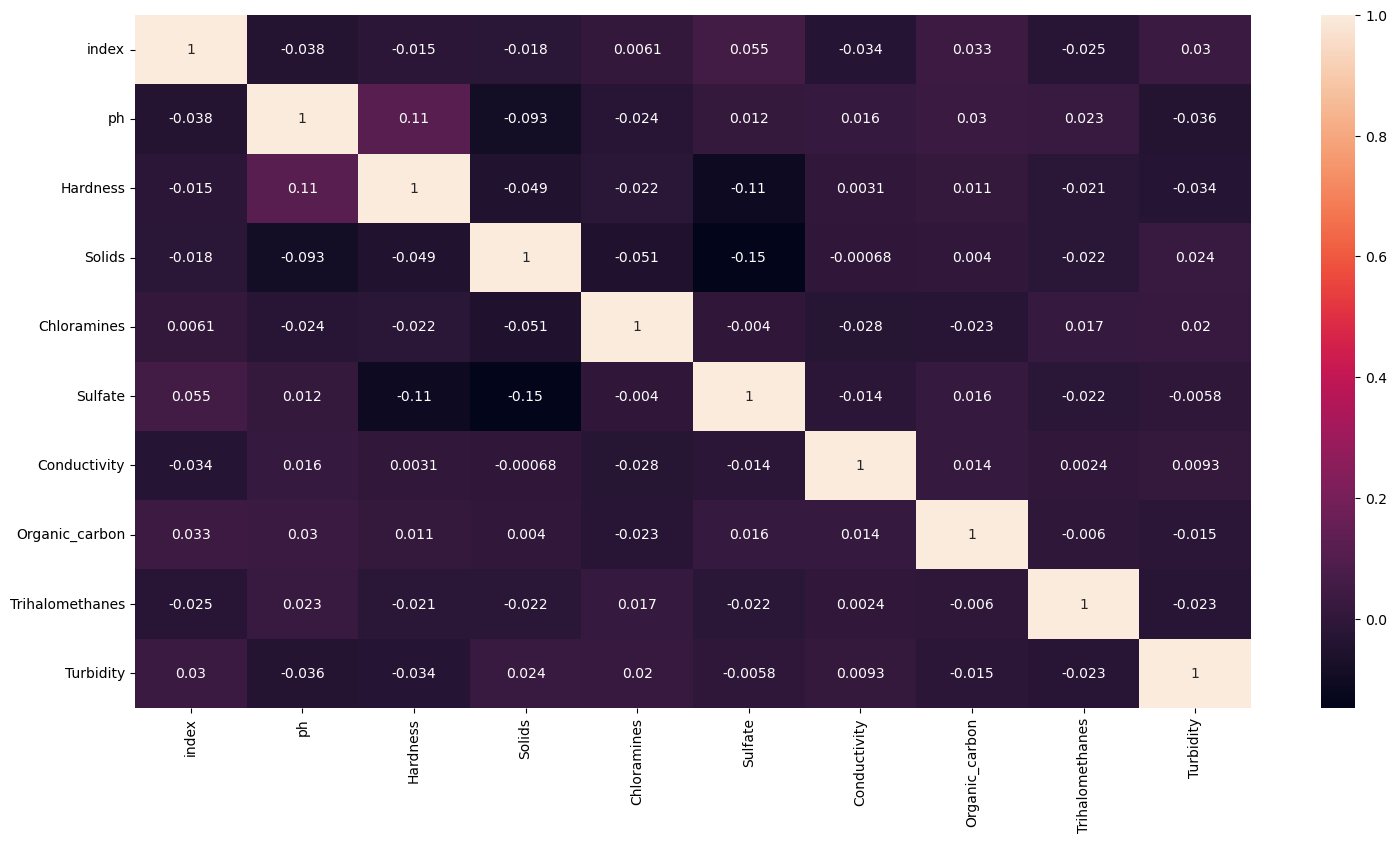

In [142]:
plt.figure(figsize = (18,9))
sn.heatmap(x_normal.corr() , annot = True)

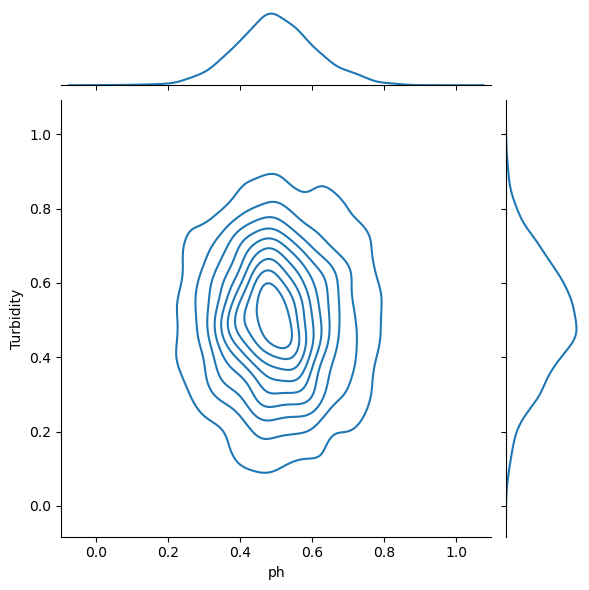

In [143]:
sn.jointplot( x = 'ph' , y = 'Turbidity'  , data = x_normal , kind = 'kde')

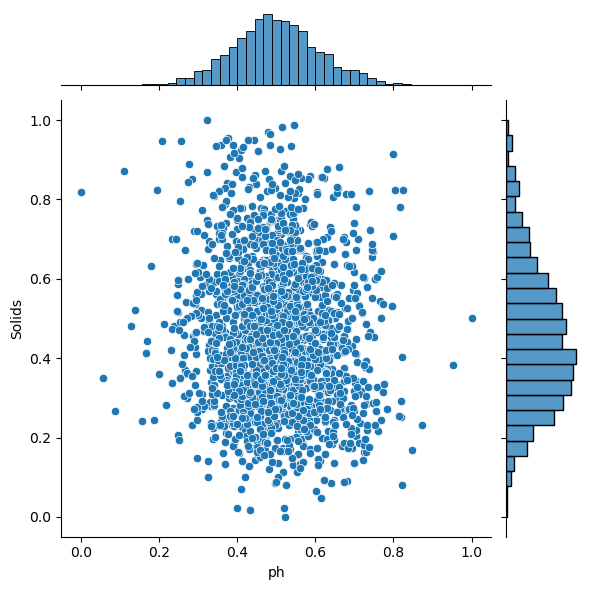

In [144]:
sn.jointplot(x = 'ph' , y = 'Solids' , data = x_normal ) 

In [145]:
x = x_normal


In [146]:
x

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.587349,0.577747,0.459108,0.568199,0.587318,0.347575,0.654522,0.795029,0.630115
1,0.000306,0.643654,0.441300,0.373636,0.439304,0.431910,0.423142,0.377248,0.202914,0.520358
2,0.000612,0.388934,0.470876,0.601517,0.524364,0.486902,0.169540,0.249922,0.401487,0.219973
3,0.000918,0.725820,0.715942,0.601539,0.521683,0.709573,0.176386,0.467200,0.658678,0.242428
4,0.001224,0.610517,0.532588,0.282504,0.270288,0.409220,0.586981,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...,...
2006,0.998776,0.636224,0.580511,0.330098,0.418063,0.441203,0.405939,0.310364,0.402799,0.627156
2007,0.999082,0.470143,0.548826,0.358146,0.538273,0.413210,0.274466,0.565061,0.175889,0.395061
2008,0.999388,0.817826,0.087434,0.780107,0.670774,0.261694,0.512339,0.563265,0.285745,0.578674
2009,0.999694,0.424187,0.464092,0.546293,0.541633,0.550134,0.460719,0.397780,0.449156,0.440004


In [147]:
x = x_norm 

In [148]:
x

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.587349,0.577747,0.459108,0.568199,0.587318,0.347575,0.654522,0.795029,0.630115
1,0.000306,0.643654,0.441300,0.373636,0.439304,0.431910,0.423142,0.377248,0.202914,0.520358
2,0.000612,0.388934,0.470876,0.601517,0.524364,0.486902,0.169540,0.249922,0.401487,0.219973
3,0.000918,0.725820,0.715942,0.601539,0.521683,0.709573,0.176386,0.467200,0.658678,0.242428
4,0.001224,0.610517,0.532588,0.282504,0.270288,0.409220,0.586981,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...,...
2006,0.998776,0.636224,0.580511,0.330098,0.418063,0.441203,0.405939,0.310364,0.402799,0.627156
2007,0.999082,0.470143,0.548826,0.358146,0.538273,0.413210,0.274466,0.565061,0.175889,0.395061
2008,0.999388,0.817826,0.087434,0.780107,0.670774,0.261694,0.512339,0.563265,0.285745,0.578674
2009,0.999694,0.424187,0.464092,0.546293,0.541633,0.550134,0.460719,0.397780,0.449156,0.440004


In [150]:
x = data.drop(['Potability'] , axis = 1)
y = data['Potability']


In [151]:
x.head()

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,6,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,7,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425


In [153]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [154]:
X = norm_func(x)

In [155]:
X

,index,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.587349,0.577747,0.459108,0.568199,0.587318,0.347575,0.654522,0.795029,0.630115
1,0.000306,0.643654,0.441300,0.373636,0.439304,0.431910,0.423142,0.377248,0.202914,0.520358
2,0.000612,0.388934,0.470876,0.601517,0.524364,0.486902,0.169540,0.249922,0.401487,0.219973
3,0.000918,0.725820,0.715942,0.601539,0.521683,0.709573,0.176386,0.467200,0.658678,0.242428
4,0.001224,0.610517,0.532588,0.282504,0.270288,0.409220,0.586981,0.409721,0.469762,0.585049
...,...,...,...,...,...,...,...,...,...,...
2006,0.998776,0.636224,0.580511,0.330098,0.418063,0.441203,0.405939,0.310364,0.402799,0.627156
2007,0.999082,0.470143,0.548826,0.358146,0.538273,0.413210,0.274466,0.565061,0.175889,0.395061
2008,0.999388,0.817826,0.087434,0.780107,0.670774,0.261694,0.512339,0.563265,0.285745,0.578674
2009,0.999694,0.424187,0.464092,0.546293,0.541633,0.550134,0.460719,0.397780,0.449156,0.440004


In [156]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.20 , random_state = 42)

In [158]:
x_train.shape , x_test.shape

((1595, 10), (399, 10))

In [159]:
model = LogisticRegression()

In [160]:
model.fit(x_train , y_train)

LogisticRegression()

In [161]:
y_pred = model.predict(x_test)

In [162]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [188]:
from sklearn.metrics import accuracy_score , classification_report , roc_curve , roc_auc_score , confusion_matrix

In [165]:
accuracy_result = accuracy_score(y_test , y_pred)

In [166]:
accuracy_result

0.6265664160401002

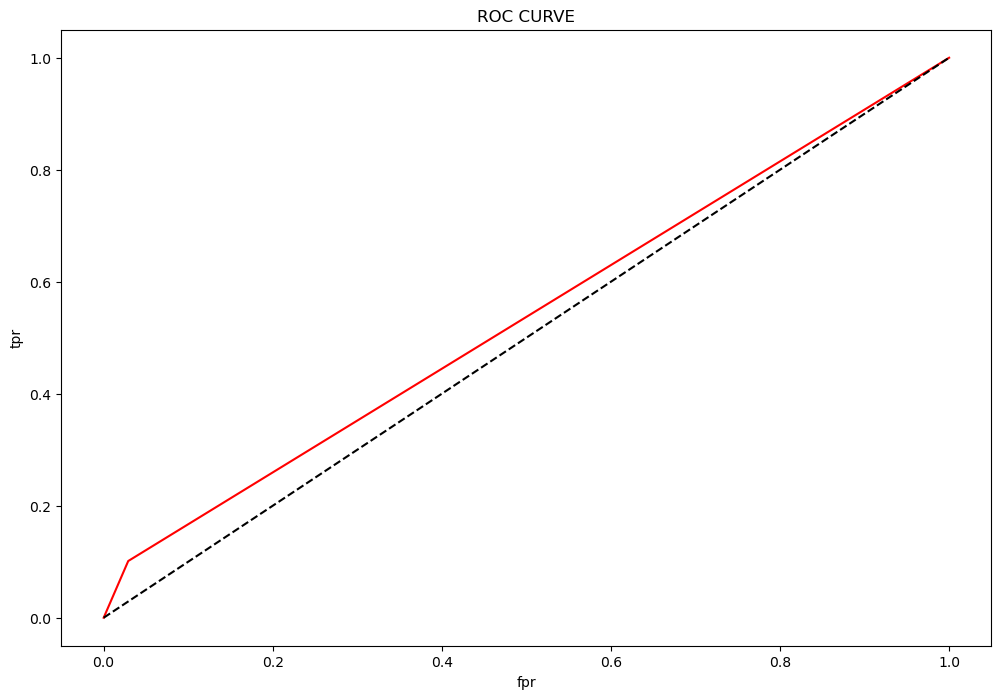

In [168]:
tpr,fpr,_ = roc_curve(y_test , y_pred)
auc = roc_auc_score(y_test , y_pred)
plt.figure(figsize = (12,8))
plt.plot(tpr , fpr ,color = 'red', label = 'ROC CURVE(AUC = %0.2F)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC CURVE')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [172]:
classification_result = classification_report(y_test , y_pred)

In [174]:
print(classification_result)

              precision    recall  f1-score   support

           0       0.62      0.97      0.76       241
           1       0.70      0.10      0.18       158

    accuracy                           0.63       399
   macro avg       0.66      0.54      0.47       399
weighted avg       0.65      0.63      0.53       399



In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
model_clf = RandomForestClassifier(n_estimators = 100 , max_features = 3)

In [177]:
model_clf.fit(x_train , y_train)

RandomForestClassifier(max_features=3)

In [178]:
y_pred_clf = model_clf.predict(x_test)

In [179]:
y_pred_clf

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [182]:
accuracy_clf = accuracy_score(y_test , y_pred_clf)

In [183]:
accuracy_clf

0.8245614035087719

In [184]:
classification_clf = classification_report(y_test , y_pred_clf)

In [186]:
print(classification_clf)

              precision    recall  f1-score   support

           0       0.80      0.94      0.87       241
           1       0.88      0.65      0.74       158

    accuracy                           0.82       399
   macro avg       0.84      0.79      0.81       399
weighted avg       0.83      0.82      0.82       399



In [189]:
confusion_mat = confusion_matrix(y_test , y_pred_clf)

In [190]:
confusion_mat

array([[227,  14],
       [ 56, 102]], dtype=int64)

## Hyperparameter Tuning

In [191]:
from sklearn.model_selection import GridSearchCV

In [195]:
param_grid = {'n_estimators':[50,100,200],
             'max_features':[None,5,10]}

In [196]:
grid_search = GridSearchCV(model_clf , param_grid , cv = 5)

In [197]:
grid_search.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_features=3),
             param_grid={'max_features': [None, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [198]:
print('best_hyperparameters:',grid_search.best_params_)

best_hyperparameters: {'max_features': None, 'n_estimators': 50}


In [200]:
print('best_accuracy:',grid_search.best_score_)

best_accuracy: 0.9893416927899686
